#Set Up Code Options

In [0]:
#import packages
import numpy as np
import pandas as pd

In [0]:
#This line will have the full data set printed out. 
#Toggle off and clear output if you no longer want to see full dataset
#pd.set_option("display.max_rows", None, "display.max_columns", None)

#read in the csv
raw_csv = 'https://raw.githubusercontent.com/dbabrams/ShallowDolomite_Group/master/Pumpage_Data_WillCounty.csv?token=ANYMEMOAALLCAHWASUAT5IK6USQLA'

#Raw Data

In [0]:
#Create a copy of the data is not edited
#This will be needed for McK for 3d
raw_data = pd.read_csv(raw_csv)
#print(raw_data)

print('size of original dataframe')
print(raw_data.shape)

size of original dataframe
(675, 46)


##Arrange Raw Data (Start Here)

In [0]:
#raw_data_2 provides all of the old data but combined by facility
#reset index to be based on well owner
raw_data_2=raw_data.set_index('owner')
#delete extra rows so that the dataframe will just be owner and the years of pumping
raw_data_2=raw_data_2.drop(['p_num','isws_facility_id', 'fac_well_num','depth_total_last_known', 'lam_x', 'lam_y'], axis=1)
#sum together all pumping for the same well owners so that the dataset is by pumping by facility
raw_data_2=raw_data_2.groupby(level=0).sum(min_count=1)

#calculate the maximum pumping for each facility
raw_data_2['max']=raw_data_2[['1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']].max(axis=1) 

#LIST facilities in order of largest pumpers to smallest


#DONT remove all facilities with nan in max and where maximum well pumping is less than 0.1mgd / "small fry" wells
#raw_data_3=raw_data_2.dropna(subset=['max'],axis=0)
#raw_data_3['small']=raw_data_3['max']-36524250
#raw_data_4=raw_data_3[raw_data_3.small > 0]
#raw_data_4=raw_data_4.drop(['small', 'max'], axis=1)

#raw_data_4
#print('size of updated dataframe')
#print(raw_data_4.shape)

size of updated dataframe
(72, 39)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [0]:
raw_data_t=raw_data_4.T
#raw_data_t

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc363354e0>,
      dtype=object)

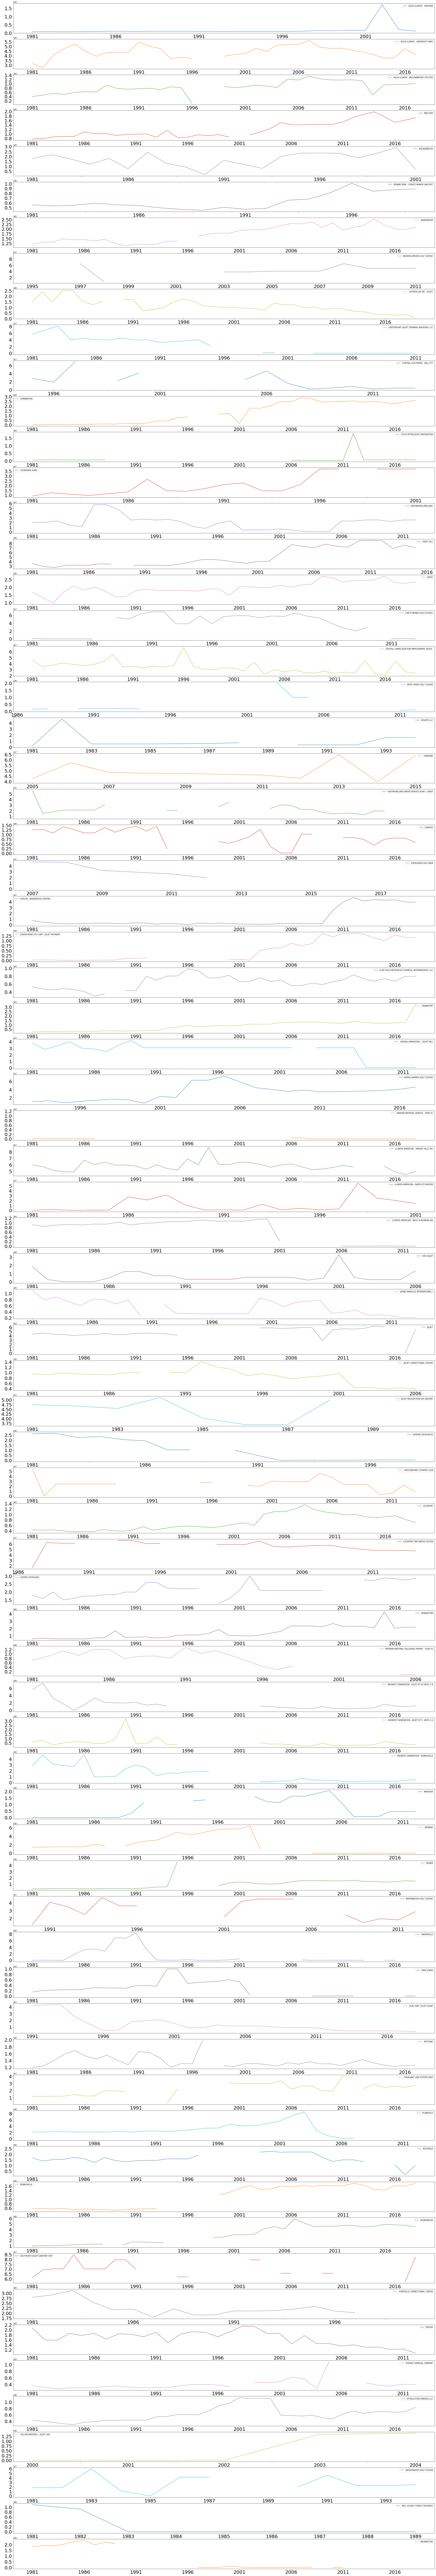

In [0]:
raw_data_t.plot(label='owner', subplots=True, figsize=(40,250), fontsize=25, sharex=False)

##Wiki Graphs

In [0]:
#filtering this data to just the main facilities:
raw_data_df=raw_data_t[['CREST HILL', 'JOLIET', 'LOCKPORT', 'ROMEOVILLE']]
#raw_data_df

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc34821ac8>,
      dtype=object)

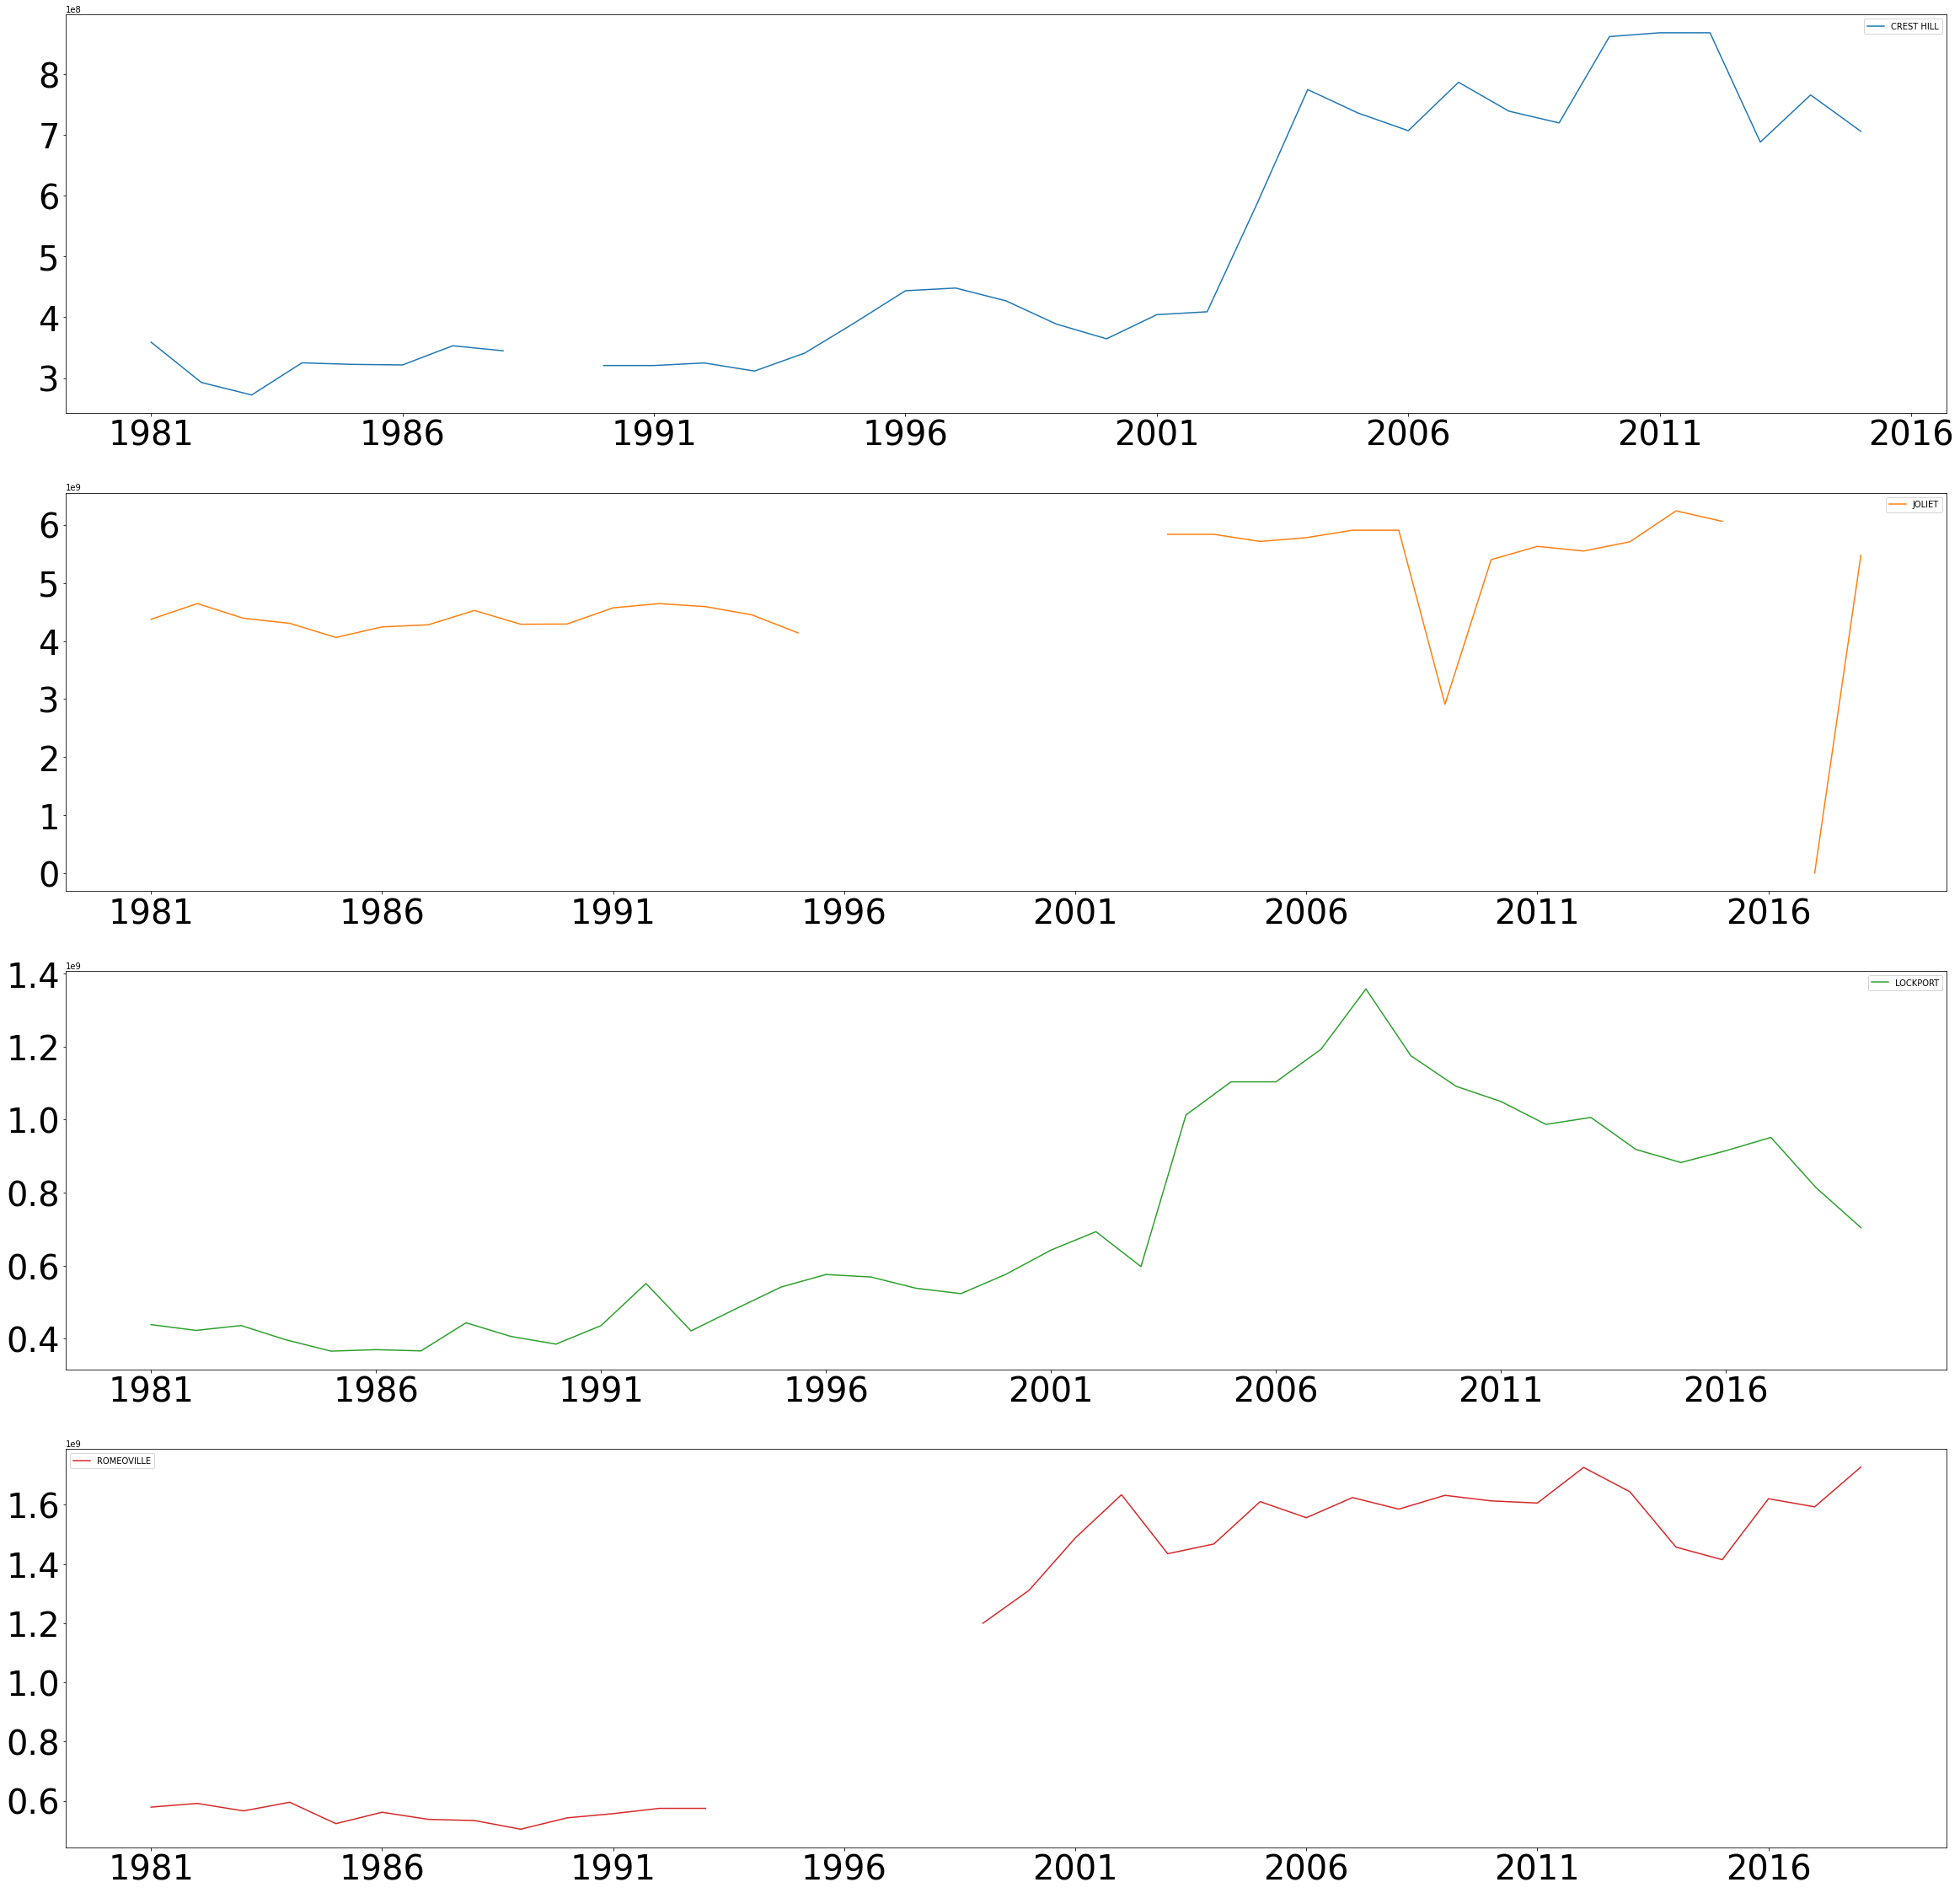

In [0]:
#plotting these main facilities
raw_data_df.plot(label='owner', subplots=True, figsize=(40,40), fontsize=40, sharex=False)

#Edited Data

##Remove Lost and Deep Wells

In [0]:
#This copy of the data we will edit heavily 
df1 = pd.read_csv(raw_csv)

#drop rows if the depth, lamx, or lamy is unknown
df1.dropna(subset=['depth_total_last_known', 'lam_x', 'lam_y'], inplace = True)
    
#with this line I am dropping all of the rows that are deep wells (>400 ft)
df1.drop(df1[df1['depth_total_last_known'] > 400].index, inplace = True) 

print('size of updated dataframe')
print(df1.shape)

size of updated dataframe
(336, 46)


##Reduce Data to include only Big Wells

In [0]:
#%%
#df2 provides all of the old data but combined by facility
#reset index to be based on well owner
df2=df1.set_index('owner')
#delete extra rows so that the dataframe will just be owner and the years of pumping
df2=df2.drop(['p_num','isws_facility_id', 'fac_well_num','depth_total_last_known', 'lam_x', 'lam_y'], axis=1)
#sum together all pumping for the same well owners so that the dataset is by pumping by facility
df2=df2.groupby(level=0).sum(min_count=1)

#calculate the maximum pumping for each facility
df2['max']=df2[['1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']].max(axis=1) 
#remove all facilities with nan in max and where maximum well pumping is less than 0.1mgd / "small fry" wells
df3=df2.dropna(subset=['max'],axis=0)
df3['small']=df3['max']-36524250
df4=df3[df3.small > 0]
df4=df4.drop(['small', 'max'], axis=1)
print('size of updated dataframe')
print(df4.shape)

size of updated dataframe
(38, 39)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


##Remove Outliers

In [0]:
#%%
for index, row in df4.iterrows():
    ave = df4.mean(axis=1)
    df4['ave']=df4.index.map(ave)
    data_1981=df4[df4.1981 > df.ave, axis = 0]
    
df4[!rowSums(df4[-1] > df4['ave']),]
    for year, pumpage in df4.iteritems():
df4['1981']=np.where((df4['1981'] >= df4['ave']*2), np.nan)
if df4['1981'] > df4['ave']*2:
    df4['1981'] = nan
        print('Year:',year)
        print('Pumpage:', pumpage)
print(df4)

df3=df3[df3.max() > 36524250]
df3=df3.drop(df3[df3['max'] < 36524250].index, inplace=True)
df['ave']=df.mean(axis=0)
print('ave')

In [0]:
#%%
#Here I am taking out the more recent years
subset = df4[['2013', '2014', '2015', '2016', '2017', '2018', '2019']]

#Here I dropping the orignal recent years from the dataframe
modify3 = df4.drop(['2013', '2014', '2015', '2016', '2017', '2018', '2019'], axis='columns')


#To bridge the more recent data, I'm doing a forward fill, back fill, and subbing in 0s
subset.fillna(method='ffill', axis='columns', inplace=True, limit=3, downcast=None)
subset.fillna(method='bfill', axis='columns', inplace=True, limit=3, downcast=None)
subset.fillna(value = 0, axis=1, inplace=True)


#This is replacing my updated recent years and forming a new dataframe
df5 = pd.concat([modify3, subset], axis = 1)

#This will fill into for up to two years of lapsed reporting data, the rest NaNs become 0
df5 = df5.fillna(method='ffill', axis='columns', limit=1)
df5 = df5.fillna(method='bfill', axis='columns', limit=1)
df5 = df5.fillna(0)

#df5

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [0]:
#swap rows and columns
df_modified_t=df5.T
#df_modified_t

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc329783c8>,
      dtype=object)

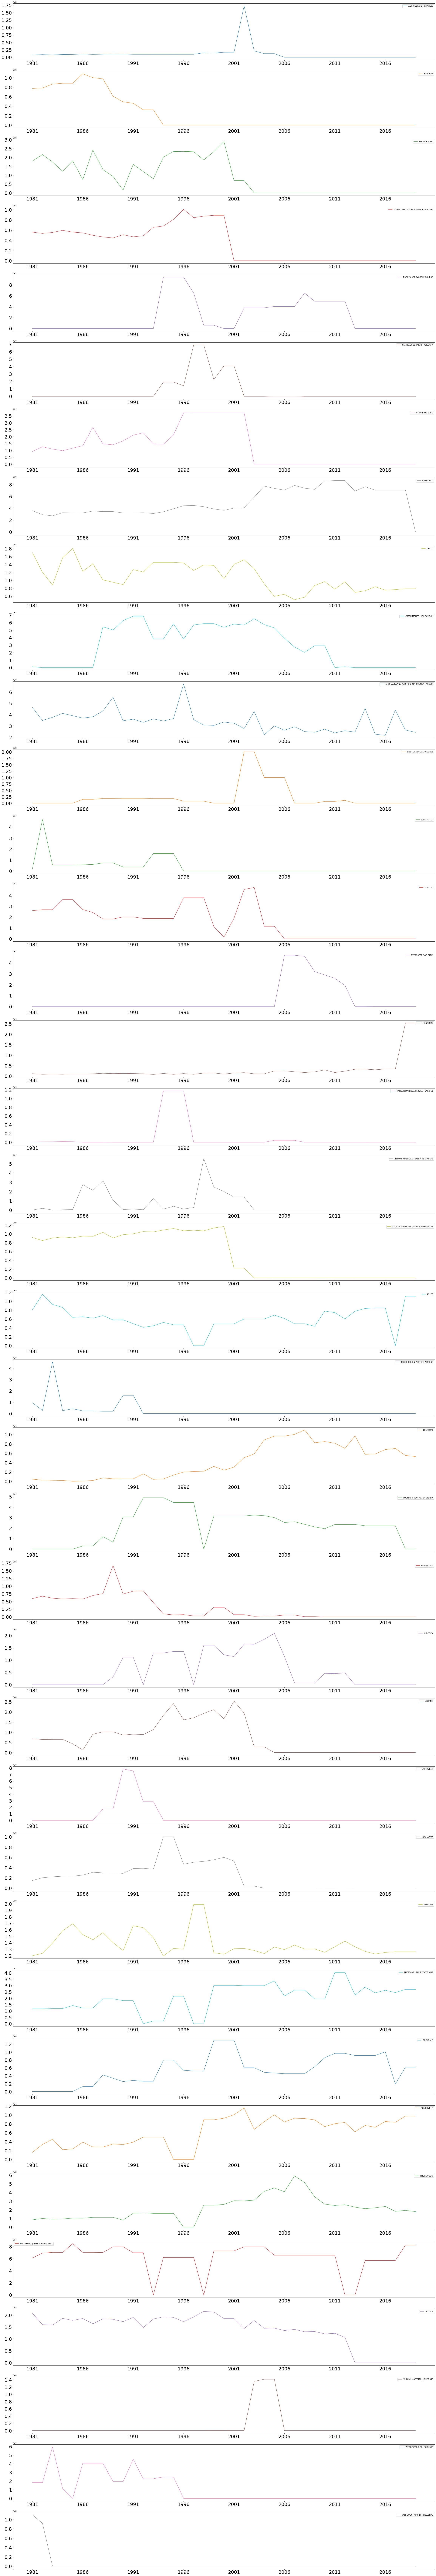

In [0]:
#plotting the modified dataframe for facility totals:
df_modified_t.plot(label='owner', subplots=True, figsize=(40,250), fontsize=25, sharex=False)

##Wiki Graphs

In [0]:
#Filtering out the data even more
#selecting the main facilities for our group:
df_modified=df_modified_t[['CREST HILL', 'JOLIET', 'LOCKPORT', 'ROMEOVILLE']]
#df_modified



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc31add860>,
      dtype=object)

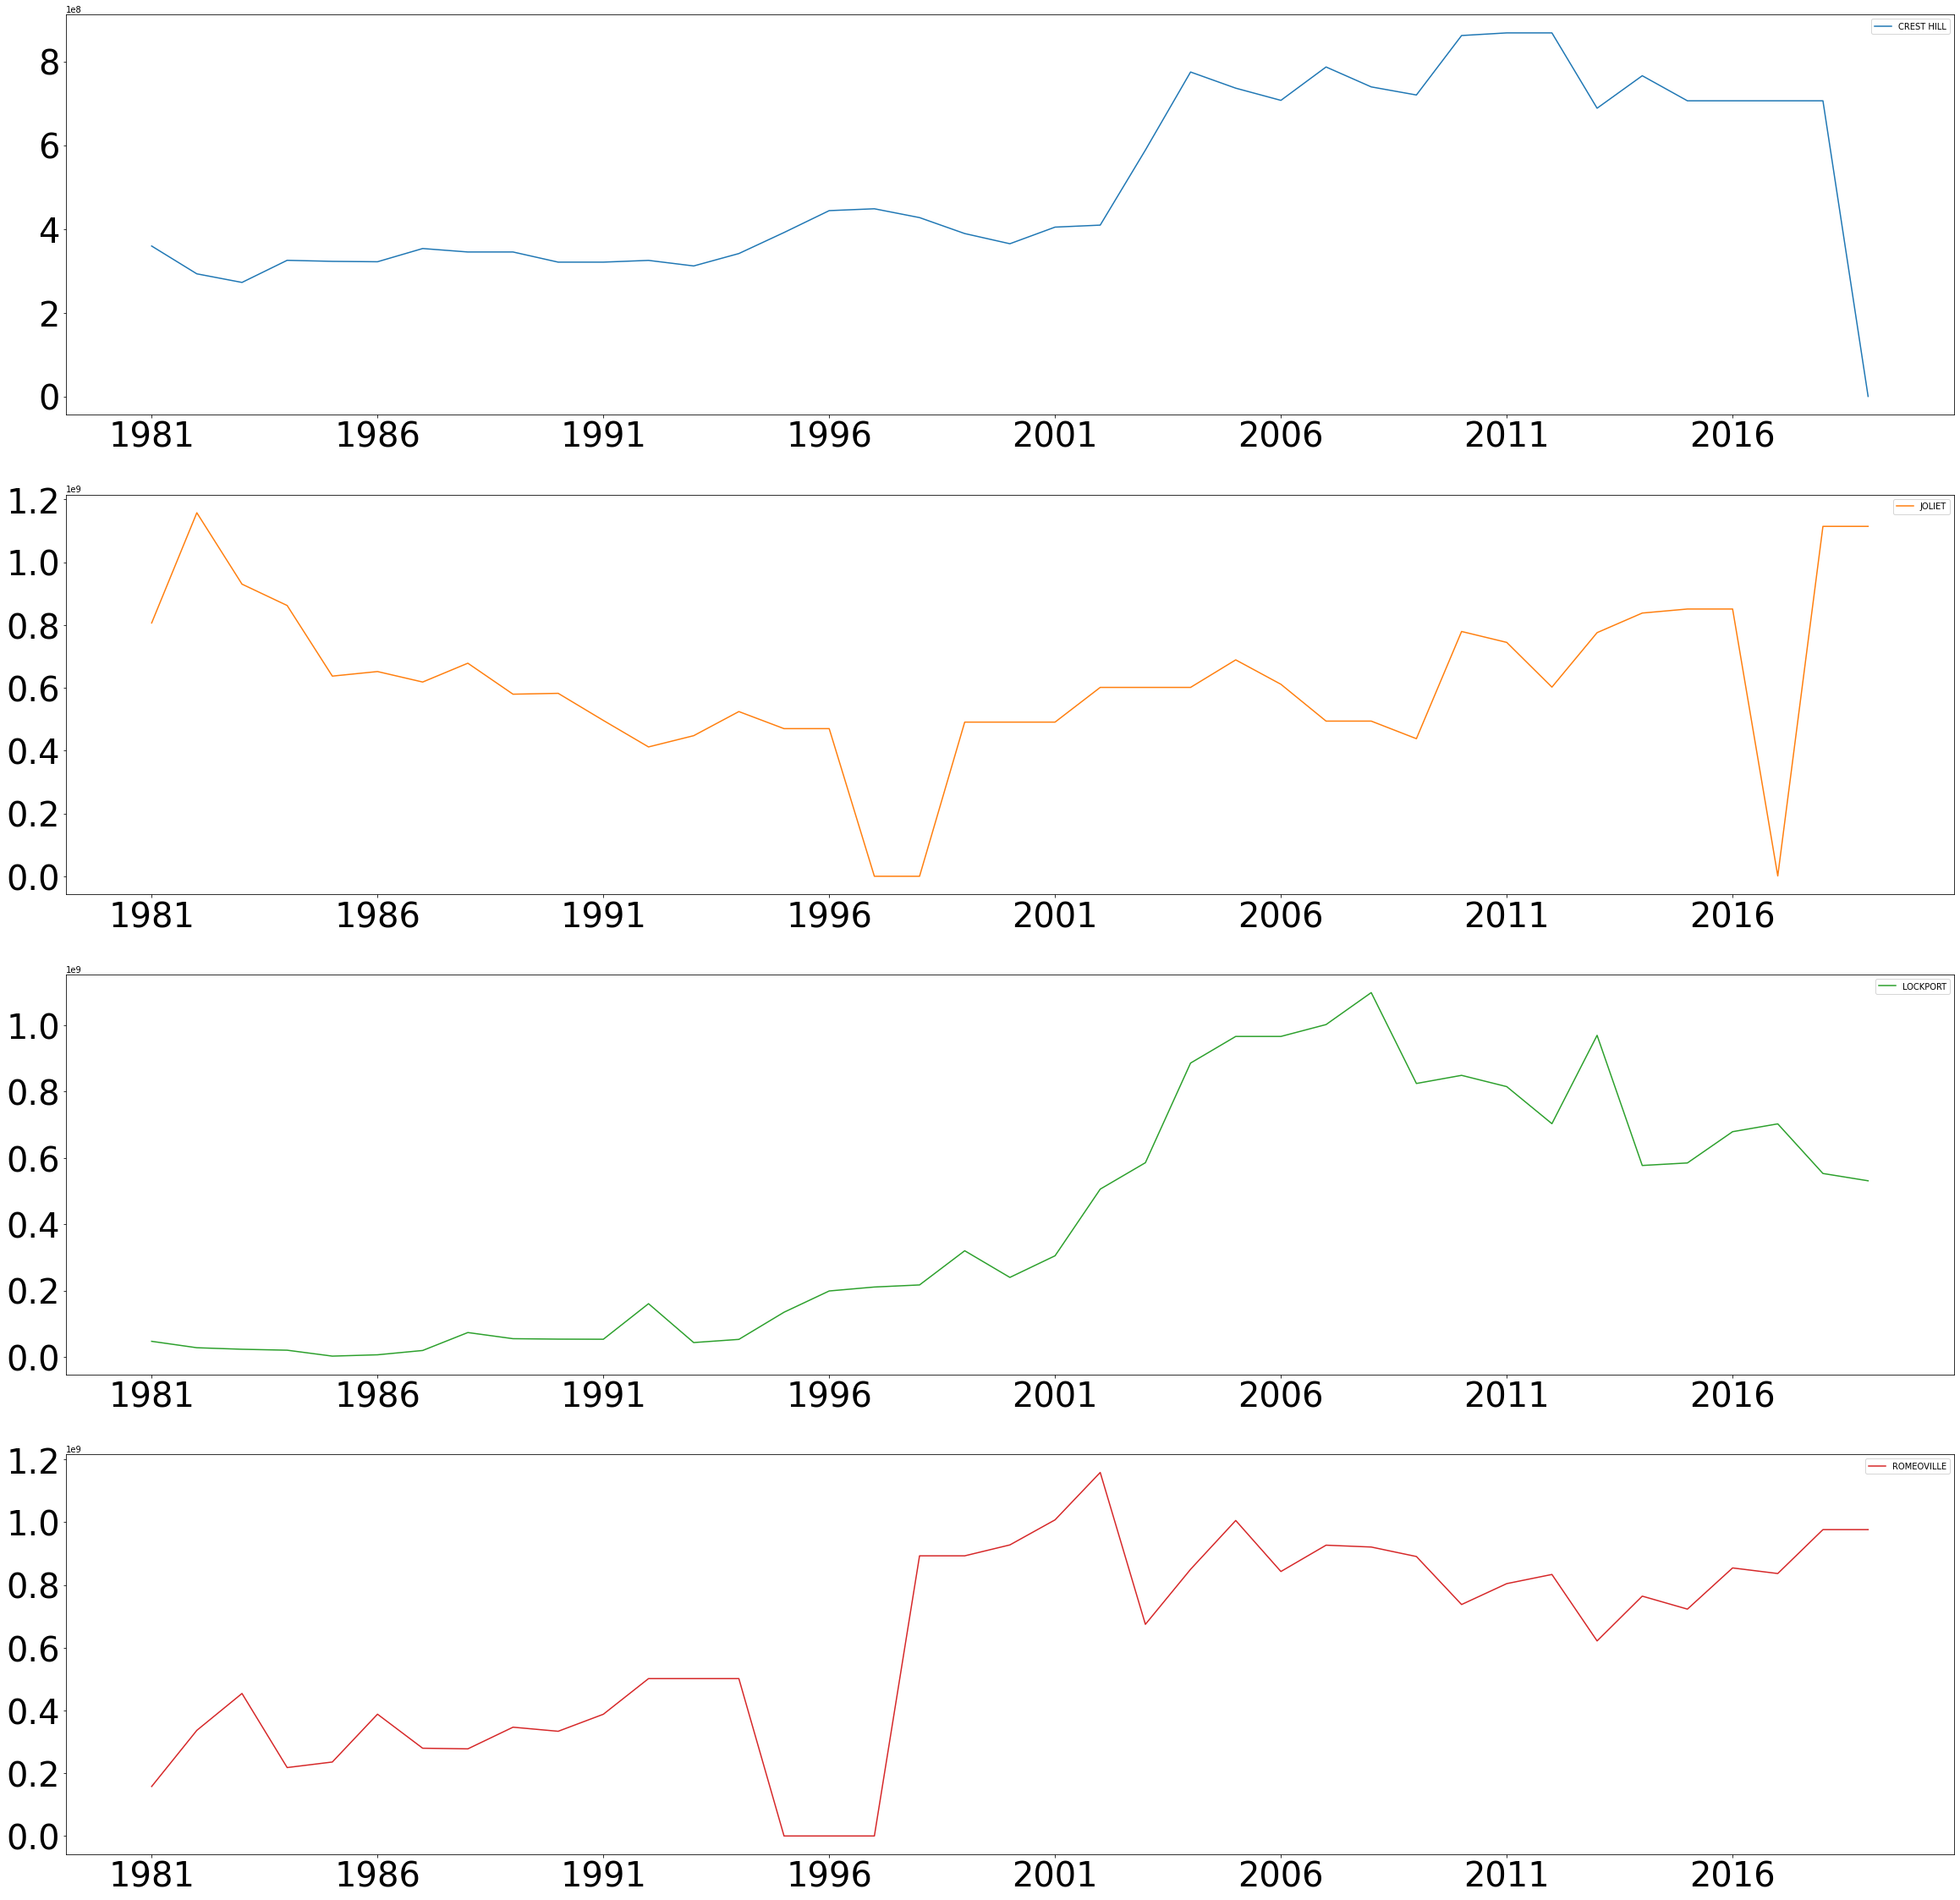

In [0]:
df_modified.plot(label='owner', subplots=True, figsize=(40,40), fontsize=40, sharex=False)